Import necessary pakages

In [1]:
using JuMP
using HiGHS
using Plots

Plot the constraints and shade feasbile area

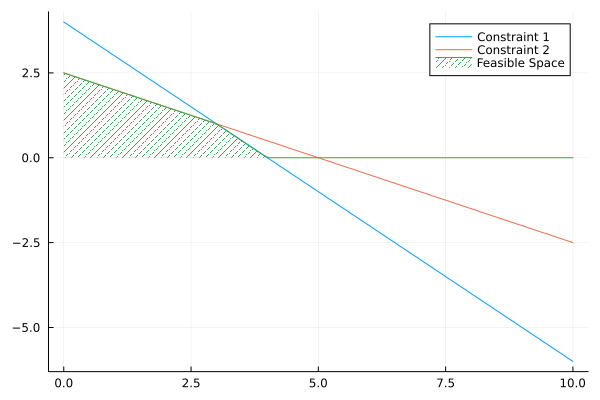

In [2]:
x = range(0,10, length=100)
y1 = @. 4-x
plot(x, y1, label = "Constraint 1")
y2 = @. (5-x)/2
plot!(x, y2, label = "Constraint 2")
y3 = @. max(min(y1, y2), 0)
plot!(x, y3, fillrange = 0, label = "Feasible Space", fillstyle = :/)

Obtain the optimal solution

In [3]:
model = Model(HiGHS.Optimizer)

@variable(model, x1>=0)
@variable(model, x2>=0)
@objective(model, Max, 3*x1 + 4*x2)
@constraint(model, x1+x2 <= 4)
@constraint(model, x1+2*x2 <= 5)
print(model)
optimize!(model)

println("Termination status: $(termination_status(model))")
if termination_status(model) == MOI.OPTIMAL
    println("Optimal objective value: $(objective_value(model))")
    println("x1: ", value(x1))
    println("x2: ", value(x2))
else
    println("No optimal solution available")
end

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 2e+00]
  Cost   [3e+00, 4e+00]
  Bound  [0e+00, 0e+00]
  RHS    [4e+00, 5e+00]
Presolving model
2 rows, 2 cols, 4 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -6.9999931588e+00 Ph1: 2(5); Du: 2(6.99999) 0s
          2     1.3000000000e+01 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 2
Objective value     :  1.3000000000e+01
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00
Termination status: OPTIMAL
Optimal objective value: 13.0
x1: 3.0
x2: 1.0


Build the dual model

In [4]:
dual_model = Model(HiGHS.Optimizer)

@variable(dual_model, y1>=0)
@variable(dual_model, y2>=0)
@objective(dual_model, Min, 4*y1 + 5*y2)
@constraint(dual_model, y1+y2 >= 4)
@constraint(dual_model, y1+2*y2 >= 5)
print(dual_model)

Plot constraints of dual model

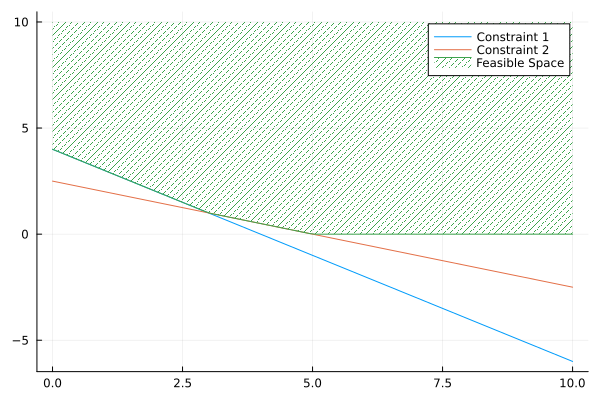

In [5]:
yy1 = range(0,10, length=100)
yy2 = @. 4-yy1
plot(yy1, yy2, label = "Constraint 1")
yy3 = @. (5-yy1)/2
plot!(yy1, yy3, label = "Constraint 2")
yy4 = @. min(max(yy2, yy3, 0), 10)
plot!(yy1, yy4, fillrange = 10, label = "Feasible Space", fillstyle = :/)

Optimal value of dual model

In [6]:
optimize!(dual_model)

println("Termination status: $(termination_status(dual_model))")
if termination_status(dual_model) == MOI.OPTIMAL
    println("Optimal objective value: $(objective_value(dual_model))")
    println("y1: ", value(y1))
    println("y2: ", value(y2))
else
    println("No optimal solution available")
end

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 2e+00]
  Cost   [4e+00, 5e+00]
  Bound  [0e+00, 0e+00]
  RHS    [4e+00, 5e+00]
Presolving model
2 rows, 2 cols, 4 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 2(9) 0s
          2     1.7000000000e+01 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 2
Objective value     :  1.7000000000e+01
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00
Termination status: OPTIMAL
Optimal objective value: 17.0
y1: 3.0
y2: 1.0
